<a href="https://colab.research.google.com/github/ibribr/DT8807/blob/master/Voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# implement hard and soft voting classifier

# Import the required libraries
import numpy as np
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# import the voting classifier
from sklearn.ensemble import VotingClassifier
# import the voting regressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
breast_cancer = datasets.load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target

print(x.shape)
print(y.shape)

# Split the train and test samples
test_samples = 100
x_train, y_train = x[:-test_samples], y[:-test_samples]
x_test, y_test = x[-test_samples:], y[-test_samples:]

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

(569, 30)
(569,)


In [ ]:
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier(n_neighbors=5)
learner_2 = linear_model.Perceptron(tol=1e-2, random_state=0)
learner_3 = svm.SVC(kernel='rbf', probability=True, gamma=0.001)  #kernel='poly' or 'rbf'
learner_4 = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=300,activation = 'logistic',solver='adam',random_state=42) # how many trianable parameters?

# Fit classifier with the training data. (try a pipeline instead of the model)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)

# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1))
print('L2:', accuracy_score(y_test, predictions_2))
print('L3:', accuracy_score(y_test, predictions_3))
print('L4:', accuracy_score(y_test, predictions_4))

L1: 0.9300699300699301
L2: 0.8531468531468531
L3: 0.9020979020979021
L4: 0.9300699300699301


------------------------------
Hard voting: 0.9020979020979021


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


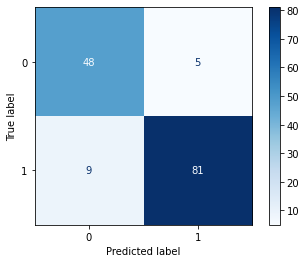

In [ ]:
# create a voting classifier with hard voting
voting_hard_classifier = VotingClassifier(estimators = [('KNN', learner_1),
                                                        ('Perc', learner_2),
                                                        ('SVM',  learner_3),
                                                        ('MLP', learner_4)], voting='hard', weights=[1,1,1,1])

# Fit classifier with the training data
voting_hard_classifier.fit(x_train, y_train)

# Predict the most voted class (most probable class)
hard_predictions = voting_hard_classifier.predict(x_test)

# Evaluate both models
print('-'*30)
print('Hard voting:', accuracy_score(y_test, hard_predictions))

plot_confusion_matrix(voting_hard_classifier, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

Soft voting: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.93      0.94      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


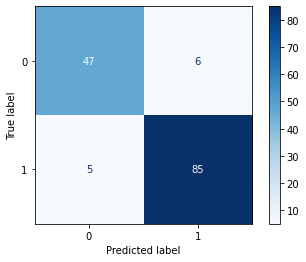

In [ ]:
# create a voting classifier with soft voting
classifiers = [('KNN', learner_1),('SVM',  learner_3), ('MLP', learner_4)]
voting_soft_classifier = VotingClassifier(estimators = classifiers, voting='soft', weights=[0.3,0.3,0.4])

voting_soft_classifier.fit(x_train, y_train)

soft_predictions = voting_soft_classifier.predict(x_test)

#print(np.c_[y_test, soft_predictions])
print('Soft voting:', accuracy_score(y_test, soft_predictions))

confusion_matrix(y_test, soft_predictions)
print(classification_report(y_test, soft_predictions))

plot_confusion_matrix(voting_soft_classifier, x_test, y_test, cmap=plt.cm.Blues)
plt.show()